In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Helper function to plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.show()

In [ ]:
# 1. Perceptron for AND Gate Implementation
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_function(linear_output)

                # Perceptron update rule
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)


AND Gate Predictions: [0 0 0 1]


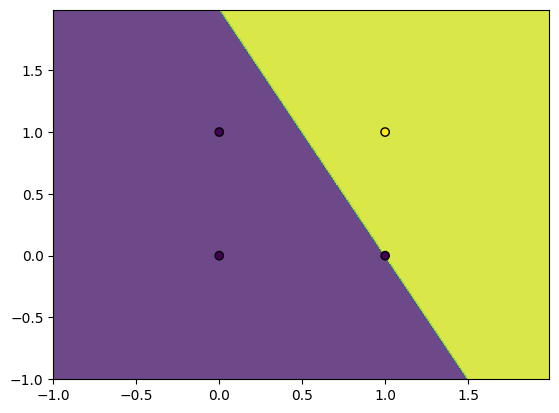

OR Gate Predictions: [0 1 1 1]


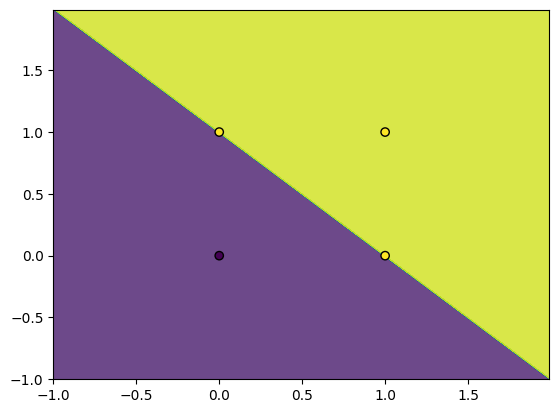

In [ ]:
# AND Gate Dataset
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

model_and = Perceptron(learning_rate=0.1, epochs=10)
model_and.fit(X_and, y_and)

# Visualize AND Gate
print("AND Gate Predictions:", model_and.predict(X_and))
plot_decision_boundary(X_and, y_and, model_and)

# 2. Perceptron for OR Gate Implementation
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

model_or = Perceptron(learning_rate=0.1, epochs=10)
model_or.fit(X_or, y_or)

# Visualize OR Gate
print("OR Gate Predictions:", model_or.predict(X_or))
plot_decision_boundary(X_or, y_or, model_or)


Binary Classification Accuracy: 1.0


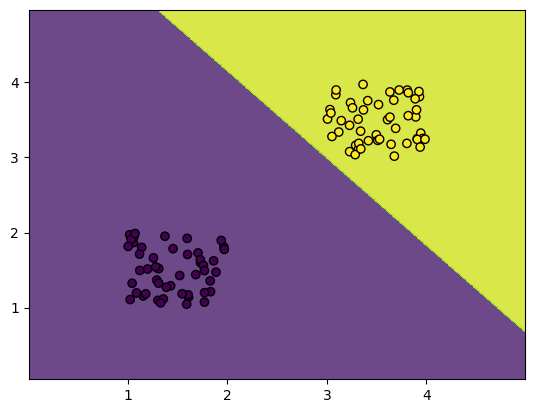

Dataset saved as 'binary_dataset.csv'


In [ ]:
# 3. Binary Classification using Perceptron on Random Dataset
# Generate Random Dataset
def create_binary_dataset():
    np.random.seed(42)
    X1 = np.random.rand(50, 2) + np.array([1, 1])
    X2 = np.random.rand(50, 2) + np.array([3, 3])
    X = np.vstack((X1, X2))
    y = np.hstack((np.zeros(50), np.ones(50)))
    return X, y

X_binary, y_binary = create_binary_dataset()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Train Perceptron on Binary Dataset
model_binary = Perceptron(learning_rate=0.1, epochs=100)
model_binary.fit(X_train, y_train)

# Evaluate and Visualize
predictions = model_binary.predict(X_test)
print("Binary Classification Accuracy:", accuracy_score(y_test, predictions))
plot_decision_boundary(X_binary, y_binary, model_binary)

# Save dataset
binary_dataset = pd.DataFrame(X_binary, columns=['Feature1', 'Feature2'])
binary_dataset['Label'] = y_binary
binary_dataset.to_csv('binary_dataset.csv', index=False)
print("Dataset saved as 'binary_dataset.csv'")


Single Layer Perceptron AND Predictions: [0 0 0 1]


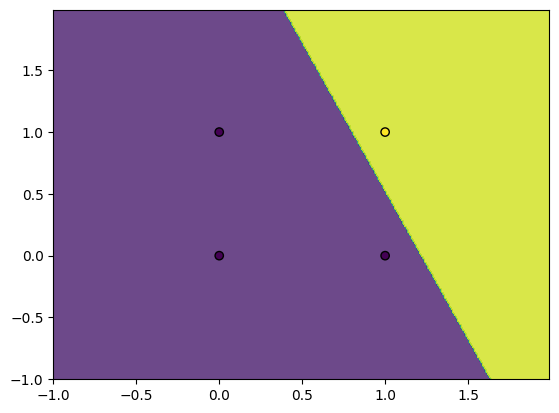

Single Layer Perceptron OR Predictions: [0 1 1 1]


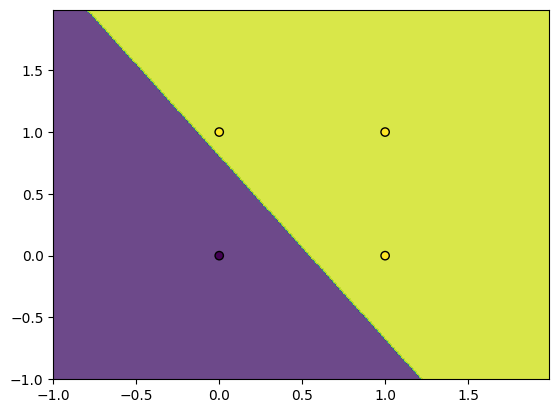

In [ ]:
# 4. Single Layer Perceptron for AND and OR Gates
class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.rand(n_features)
        self.bias = np.random.rand()

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_function(linear_output)

                # Update weights and bias
                error = y[idx] - y_pred
                self.weights += self.lr * error * x_i
                self.bias += self.lr * error

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)

    def activation_function(self, x):
        return np.where(x >= 0.5, 1, 0)

# Train and Visualize Single Layer Perceptron for AND Gate
slp_and = SingleLayerPerceptron(learning_rate=0.1, epochs=10)
slp_and.fit(X_and, y_and)
print("Single Layer Perceptron AND Predictions:", slp_and.predict(X_and))
plot_decision_boundary(X_and, y_and, slp_and)

# Train and Visualize Single Layer Perceptron for OR Gate
slp_or = SingleLayerPerceptron(learning_rate=0.1, epochs=10)
slp_or.fit(X_or, y_or)
print("Single Layer Perceptron OR Predictions:", slp_or.predict(X_or))
plot_decision_boundary(X_or, y_or, slp_or)


Single Layer Perceptron Binary Classification Accuracy: 1.0


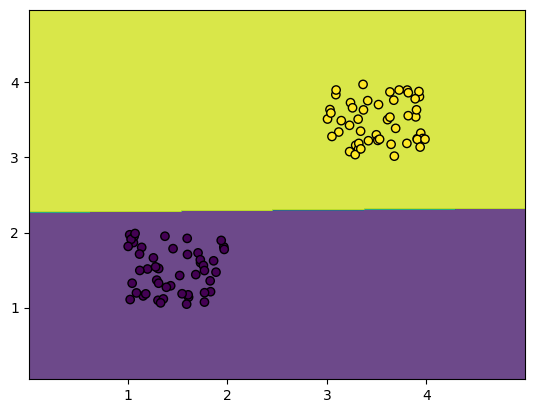

In [ ]:
# Binary Classification using Single Layer Perceptron on Random Dataset
slp_binary = SingleLayerPerceptron(learning_rate=0.1, epochs=100)
slp_binary.fit(X_train, y_train)

# Evaluate and Visualize
predictions_slp = slp_binary.predict(X_test)
print("Single Layer Perceptron Binary Classification Accuracy:", accuracy_score(y_test, predictions_slp))
plot_decision_boundary(X_binary, y_binary, slp_binary)


Multi-Class Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


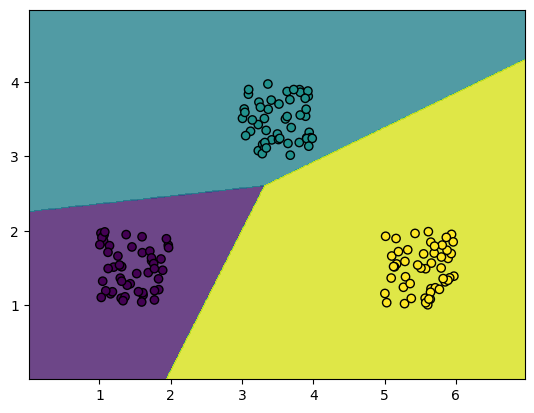

In [ ]:
# 5. Multi-Class Classification using Single Layer Perceptron
# Generate Multiclass Dataset
def create_multiclass_dataset():
    np.random.seed(42)
    X1 = np.random.rand(50, 2) + np.array([1, 1])
    X2 = np.random.rand(50, 2) + np.array([3, 3])
    X3 = np.random.rand(50, 2) + np.array([5, 1])
    X = np.vstack((X1, X2, X3))
    y = np.hstack((np.zeros(50), np.ones(50), np.full(50, 2)))
    return X, y

X_multi, y_multi = create_multiclass_dataset()

# One-Hot Encoding for Labels
encoder = OneHotEncoder(sparse_output=False)
y_multi_encoded = encoder.fit_transform(y_multi.reshape(-1, 1))

# Multi-Class Perceptron
class MultiClassPerceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = y.shape[1]
        self.weights = np.random.rand(n_classes, n_features)
        self.bias = np.random.rand(n_classes)

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(self.weights, x_i) + self.bias
                y_pred = self.activation_function(linear_output)

                # Update weights and bias
                error = y[idx] - y_pred
                self.weights += self.lr * error[:, None] * x_i
                self.bias += self.lr * error

    def predict(self, X):
        linear_output = np.dot(X, self.weights.T) + self.bias
        return np.argmax(linear_output, axis=1)

    def activation_function(self, x):
        return np.where(x >= 0.5, 1, 0)

# Train Multi-Class Perceptron
multi_class_model = MultiClassPerceptron(learning_rate=0.1, epochs=500)
multi_class_model.fit(X_multi, y_multi_encoded)

# Predict and Visualize
y_pred_multi = multi_class_model.predict(X_multi)
print("Multi-Class Predictions:", y_pred_multi)
plot_decision_boundary(X_multi, y_multi, multi_class_model)
